# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

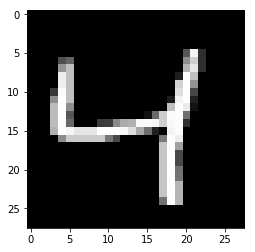

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [6]:
mnist.train.images[0].shape

(784,)

In [7]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [8]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [10]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6942
Epoch: 1/20... Training loss: 0.6908
Epoch: 1/20... Training loss: 0.6874
Epoch: 1/20... Training loss: 0.6839
Epoch: 1/20... Training loss: 0.6789
Epoch: 1/20... Training loss: 0.6735
Epoch: 1/20... Training loss: 0.6672
Epoch: 1/20... Training loss: 0.6595
Epoch: 1/20... Training loss: 0.6512
Epoch: 1/20... Training loss: 0.6400
Epoch: 1/20... Training loss: 0.6285
Epoch: 1/20... Training loss: 0.6171
Epoch: 1/20... Training loss: 0.6015
Epoch: 1/20... Training loss: 0.5856
Epoch: 1/20... Training loss: 0.5693
Epoch: 1/20... Training loss: 0.5517
Epoch: 1/20... Training loss: 0.5338
Epoch: 1/20... Training loss: 0.5163
Epoch: 1/20... Training loss: 0.4987
Epoch: 1/20... Training loss: 0.4804
Epoch: 1/20... Training loss: 0.4642
Epoch: 1/20... Training loss: 0.4453
Epoch: 1/20... Training loss: 0.4232
Epoch: 1/20... Training loss: 0.4097
Epoch: 1/20... Training loss: 0.3969
Epoch: 1/20... Training loss: 0.3869
Epoch: 1/20... Training loss: 0.3680
E

Epoch: 1/20... Training loss: 0.1816
Epoch: 1/20... Training loss: 0.1816
Epoch: 1/20... Training loss: 0.1767
Epoch: 1/20... Training loss: 0.1789
Epoch: 1/20... Training loss: 0.1780
Epoch: 1/20... Training loss: 0.1775
Epoch: 2/20... Training loss: 0.1799
Epoch: 2/20... Training loss: 0.1755
Epoch: 2/20... Training loss: 0.1807
Epoch: 2/20... Training loss: 0.1785
Epoch: 2/20... Training loss: 0.1791
Epoch: 2/20... Training loss: 0.1802
Epoch: 2/20... Training loss: 0.1741
Epoch: 2/20... Training loss: 0.1807
Epoch: 2/20... Training loss: 0.1763
Epoch: 2/20... Training loss: 0.1828
Epoch: 2/20... Training loss: 0.1815
Epoch: 2/20... Training loss: 0.1829
Epoch: 2/20... Training loss: 0.1786
Epoch: 2/20... Training loss: 0.1744
Epoch: 2/20... Training loss: 0.1792
Epoch: 2/20... Training loss: 0.1838
Epoch: 2/20... Training loss: 0.1791
Epoch: 2/20... Training loss: 0.1727
Epoch: 2/20... Training loss: 0.1738
Epoch: 2/20... Training loss: 0.1776
Epoch: 2/20... Training loss: 0.1717
E

Epoch: 2/20... Training loss: 0.1491
Epoch: 2/20... Training loss: 0.1456
Epoch: 2/20... Training loss: 0.1485
Epoch: 2/20... Training loss: 0.1441
Epoch: 2/20... Training loss: 0.1481
Epoch: 2/20... Training loss: 0.1443
Epoch: 2/20... Training loss: 0.1497
Epoch: 2/20... Training loss: 0.1515
Epoch: 2/20... Training loss: 0.1435
Epoch: 2/20... Training loss: 0.1463
Epoch: 2/20... Training loss: 0.1422
Epoch: 2/20... Training loss: 0.1488
Epoch: 2/20... Training loss: 0.1500
Epoch: 2/20... Training loss: 0.1463
Epoch: 2/20... Training loss: 0.1421
Epoch: 2/20... Training loss: 0.1392
Epoch: 2/20... Training loss: 0.1482
Epoch: 2/20... Training loss: 0.1481
Epoch: 2/20... Training loss: 0.1451
Epoch: 2/20... Training loss: 0.1470
Epoch: 2/20... Training loss: 0.1459
Epoch: 2/20... Training loss: 0.1432
Epoch: 2/20... Training loss: 0.1477
Epoch: 2/20... Training loss: 0.1437
Epoch: 2/20... Training loss: 0.1411
Epoch: 2/20... Training loss: 0.1498
Epoch: 2/20... Training loss: 0.1487
E

Epoch: 3/20... Training loss: 0.1297
Epoch: 3/20... Training loss: 0.1297
Epoch: 3/20... Training loss: 0.1309
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1305
Epoch: 3/20... Training loss: 0.1280
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1291
Epoch: 3/20... Training loss: 0.1311
Epoch: 3/20... Training loss: 0.1281
Epoch: 3/20... Training loss: 0.1264
Epoch: 3/20... Training loss: 0.1250
Epoch: 3/20... Training loss: 0.1286
Epoch: 3/20... Training loss: 0.1303
Epoch: 3/20... Training loss: 0.1275
Epoch: 3/20... Training loss: 0.1292
Epoch: 3/20... Training loss: 0.1285
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1307
Epoch: 3/20... Training loss: 0.1302
Epoch: 3/20... Training loss: 0.1245
Epoch: 3/20... Training loss: 0.1316
Epoch: 3/20... Training loss: 0.1289
Epoch: 3/20... Training loss: 0.1271
Epoch: 3/20... Training loss: 0.1290
Epoch: 3/20... Training loss: 0.1254
Epoch: 3/20... Training loss: 0.1295
E

Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1174
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1125
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1129
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1115
Epoch: 4/20... Training loss: 0.1174
E

Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1172
Epoch: 5/20... Training loss: 0.1148
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1147
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1043
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1095
E

Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1106
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1085
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1119
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1088
E

Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1063
Epoch: 7/20... Training loss: 0.1048
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1053
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1036
E

Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.1039
Epoch: 8/20... Training loss: 0.1024
Epoch: 8/20... Training loss: 0.0941
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0940
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.1017
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0966
E

Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0937
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.1014
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0899
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.1006
E

Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.1010
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.1049
Epoch: 10/20... Training loss: 0.0988
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0995
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0910
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0981
Epoch: 11/20... Training loss: 0.0920
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.1001
Epoch: 11/20... Training loss: 0.0986
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0985
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0903
Epoch: 11/20... Training loss: 0.0987
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0988
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0988
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0979
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0973
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0991
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0909
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0977
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0903
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0981
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0974
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0880
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0865
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0900
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0979
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0994
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0883
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0905
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0980
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0895
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.0976
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0978
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0967
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0976
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0962
Epoch: 18/20... Training loss: 0.0988
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.1004
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0890
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0882
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0964
Epoch: 19/20... Training loss: 0.0999
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0903
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0967
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0900
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0976
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0904
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0968
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0901
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

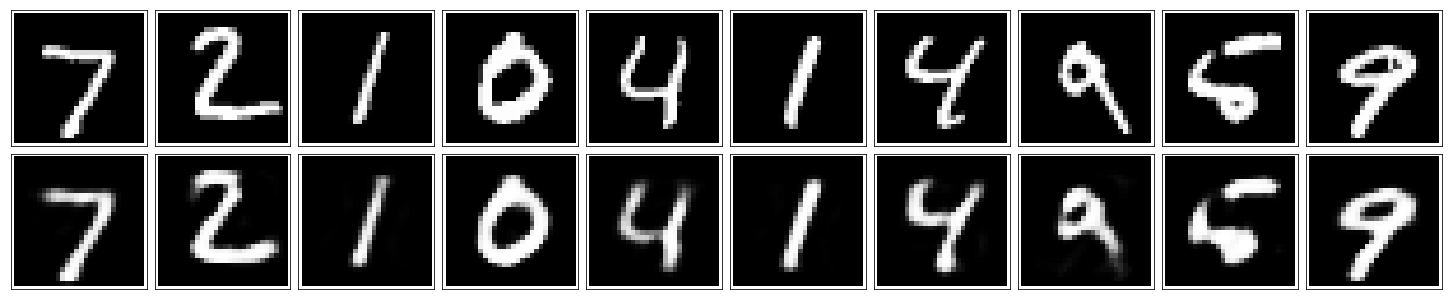

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [12]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.